In [81]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy.stats import t as tdist 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table
get_ipython().magic(u'matplotlib inline')
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi
%matplotlib inline
import statsmodels.api as sm

In [82]:
os.getcwd()

'C:\\Users\\anumeha\\Downloads'

In [83]:
#Loading Boston Data
os.chdir("/Users/anumeha/Downloads/")
boston_df = pd.read_csv('data05_boston.csv')

In [84]:
lm = sm.OLS.from_formula('medv ~ lstat', boston_df)
result = lm.fit()

In [85]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           5.08e-88
Time:                        18:06:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [86]:
result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

(0.5441462975864797, 601.6178711098953, 34.55384087938312, -0.9500493537579906)

In [87]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])

In [88]:
result.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [89]:
def predict(res, new):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [90]:
predict(result, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


In [91]:
import seaborn as sns

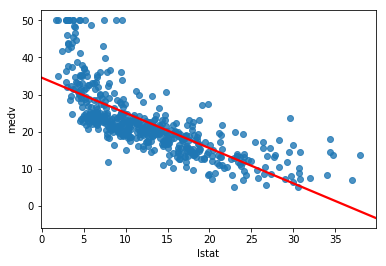

In [92]:
sns.regplot('lstat', 'medv', boston_df, line_kws = {"color":"r"}, ci=None)

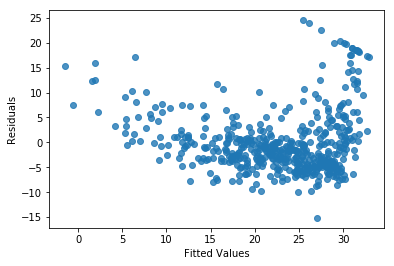

In [93]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

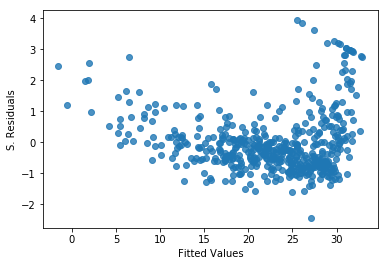

In [94]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

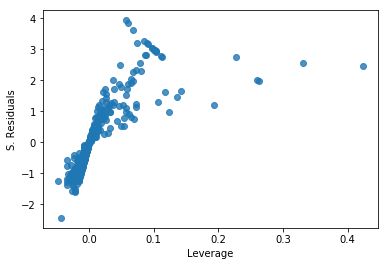

In [95]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

In [96]:
model = sm.OLS.from_formula('medv ~ lstat + ptratio + rm', boston_df)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          2.69e-123
Time:                        18:06:55   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

In [97]:
#Interaction terms
model1 = sm.OLS.from_formula('medv ~ lstat*age + rm ', boston_df)
result1 = model1.fit()
print sm.OLS.from_formula('medv ~ lstat*age + rm', boston_df).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     221.8
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          2.08e-109
Time:                        18:06:55   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3175.
Df Residuals:                     501   BIC:                             3196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4671      3.646     -0.128      0.8

In [98]:
model2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', boston_df)
result2 = model2.fit()
print sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', boston_df).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          1.56e-112
Time:                        18:06:56   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [99]:
model3 = sm.OLS.from_formula('medv ~ np.log(lstat) + ptratio', boston_df)
result3 = model3.fit()
print sm.OLS.from_formula('medv ~ np.log(lstat) + ptratio', boston_df).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     584.1
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          7.22e-132
Time:                        18:06:56   Log-Likelihood:                -1536.5
No. Observations:                 506   AIC:                             3079.
Df Residuals:                     503   BIC:                             3092.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        64.9709      1.933     33.603

In [100]:
model4 = sm.OLS.from_formula('medv ~ np.sqrt(lstat) + np.square(rm)', boston_df)
result4 = model4.fit()
print sm.OLS.from_formula('medv ~ np.sqrt(lstat) + np.square(rm)', boston_df).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     575.5
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          9.52e-131
Time:                        18:06:56   Log-Likelihood:                -1539.1
No. Observations:                 506   AIC:                             3084.
Df Residuals:                     503   BIC:                             3097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         25.2511      2.107     11.